In [55]:
import nba_api.stats.endpoints as nba
import nba_api.stats.static.players as p
import nba_api.stats.static.teams as t

In [3]:
trae = p.find_players_by_full_name('Trae Young')
trae

[{'id': 1629027,
  'full_name': 'Trae Young',
  'first_name': 'Trae',
  'last_name': 'Young',
  'is_active': True}]

In [56]:
hawks = t.find_teams_by_full_name('Atlanta Hawks')
hawks

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949}]

In [58]:
teamid = hawks[0]['id']
teamid

1610612737

In [4]:
id = trae[0]['id']
id

1629027

In [5]:
traeshots = nba.ShotChartDetail(player_id=id,season_nullable='2023-24',team_id='0',season_type_all_star='Regular Season',context_measure_simple='FGA')

In [6]:
shotsdf = traeshots.get_data_frames()[0]

In [7]:
shotsdf.sort_values(by=['GAME_DATE','GAME_EVENT_ID'],inplace=True,ascending=False)
shotsdf.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
983,Shot Chart Detail,0022301188,504,1629027,Trae Young,1610612737,Atlanta Hawks,3,0,23,...,Center(C),Less Than 8 ft.,2,21,12,1,1,20240414,IND,ATL
982,Shot Chart Detail,0022301188,482,1629027,Trae Young,1610612737,Atlanta Hawks,3,1,59,...,Left Side Center(LC),24+ ft.,29,-228,184,1,0,20240414,IND,ATL
981,Shot Chart Detail,0022301188,441,1629027,Trae Young,1610612737,Atlanta Hawks,3,4,31,...,Center(C),24+ ft.,34,0,348,1,0,20240414,IND,ATL
980,Shot Chart Detail,0022301188,434,1629027,Trae Young,1610612737,Atlanta Hawks,3,4,51,...,Left Side(L),8-16 ft.,11,-62,96,1,0,20240414,IND,ATL
979,Shot Chart Detail,0022301188,312,1629027,Trae Young,1610612737,Atlanta Hawks,2,2,26,...,Center(C),Less Than 8 ft.,6,-44,50,1,0,20240414,IND,ATL


In [60]:
hawksshots = nba.ShotChartDetail(season_nullable='2023-24',team_id=teamid,season_type_all_star='Regular Season',context_measure_simple='FGA',player_id='0')

In [61]:
hawksshotsdf = hawksshots.get_data_frames()[0]

In [62]:
hawksshotsdf.shape

(7584, 24)

In [8]:
shotsdf.shape

(1008, 24)

In [9]:
shotsdf.describe()

,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,1008.000000,1008.0,1.008000e+03,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.0,1008.000000
mean,350.387897,1629027.0,1.610613e+09,2.571429,5.166667,27.602183,17.105159,-1.746032,149.358135,1.0,0.429563
std,201.267205,0.0,0.000000e+00,1.148747,3.895609,17.563376,10.726391,95.000847,105.675694,0.0,0.495260
min,7.000000,1629027.0,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-237.000000,-15.000000,1.0,0.000000
25%,171.750000,1629027.0,1.610613e+09,2.000000,1.000000,12.000000,7.000000,-60.250000,51.750000,1.0,0.000000
50%,348.000000,1629027.0,1.610613e+09,3.000000,5.000000,28.000000,19.000000,1.000000,141.000000,1.0,0.000000
75%,521.000000,1629027.0,1.610613e+09,4.000000,9.000000,42.000000,26.000000,50.000000,245.000000,1.0,1.000000
max,774.000000,1629027.0,1.610613e+09,5.000000,11.000000,59.000000,62.000000,244.000000,595.000000,1.0,1.000000


In [10]:
shotsdf.isnull().sum()

GRID_TYPE              0
GAME_ID                0
GAME_EVENT_ID          0
PLAYER_ID              0
PLAYER_NAME            0
TEAM_ID                0
TEAM_NAME              0
PERIOD                 0
MINUTES_REMAINING      0
SECONDS_REMAINING      0
EVENT_TYPE             0
ACTION_TYPE            0
SHOT_TYPE              0
SHOT_ZONE_BASIC        0
SHOT_ZONE_AREA         0
SHOT_ZONE_RANGE        0
SHOT_DISTANCE          0
LOC_X                  0
LOC_Y                  0
SHOT_ATTEMPTED_FLAG    0
SHOT_MADE_FLAG         0
GAME_DATE              0
HTM                    0
VTM                    0
dtype: int64

In [11]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
all_data_df = pd.DataFrame()

query_params = {}
realseason = '2023-24'
# Period Gte
period_gte = 1
if period_gte != 0:
    query_params["PeriodGte"] = period_gte

# Period Lte
period_lte = 8
if period_lte != 0:
    query_params["PeriodLte"] = period_lte

  

for period in range(period_gte, period_lte+1):
            # Set the PeriodEquals for this loop iteration
            query_params["PeriodEquals"] = period
            
            # Construct the URL with the selected parameters
            base_url = f"https://api.pbpstats.com/get-shots/nba?Season={realseason}&SeasonType=Regular%20Season&EntityType=Player&EntityId={id}"
            
            # For this example, we simulate the API call with a placeholder function
            # Replace this with the actual code to get data from the API
            response = requests.get(base_url, params=query_params)
            
            if response.status_code == 200:
                # Assuming the API returns JSON data that can be converted to a pandas DataFrame
                data = response.json()
                data2 = data["results"]

                # Convert the data to a pandas DataFrame (ensure data format matches what the API returns)
                df = pd.DataFrame(data2)
                
                # Append the result to the larger DataFrame
                all_data_df = pd.concat([all_data_df, df], ignore_index=True)
            print(f'Done with {period}')

Done with 1
Done with 2
Done with 3
Done with 4


/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_1631/791799215.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data_df = pd.concat([all_data_df, df], ignore_index=True)


Done with 5
Done with 6
Done with 7
Done with 8


In [26]:
assistdf = pd.DataFrame()

query_params = {}
realseason = '2023-24'
# Period Gte
period_gte = 1
if period_gte != 0:
    query_params["PeriodGte"] = period_gte

# Period Lte
period_lte = 8
if period_lte != 0:
    query_params["PeriodLte"] = period_lte

  

for period in range(period_gte, period_lte+1):
            # Set the PeriodEquals for this loop iteration
            query_params["PeriodEquals"] = period
            
            # Construct the URL with the selected parameters
            base_url = f"https://api.pbpstats.com/get-shots/nba?Season=2023-24&SeasonType=Regular%2BSeason&EntityType=Team&EntityId={teamid}&AssistPlayerId={id}&StartType=All&Assisted=true"
            
            # For this example, we simulate the API call with a placeholder function
            # Replace this with the actual code to get data from the API
            response = requests.get(base_url, params=query_params)
            
            if response.status_code == 200:
                # Assuming the API returns JSON data that can be converted to a pandas DataFrame
                data = response.json()
                data2 = data["results"]

                # Convert the data to a pandas DataFrame (ensure data format matches what the API returns)
                df = pd.DataFrame(data2)
                
                # Append the result to the larger DataFrame
                assistdf = pd.concat([assistdf, df], ignore_index=True)
            print(f'Done with {period}')

Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8


In [27]:
all_data_df.shape

(1008, 49)

In [28]:
shotsdf.shape

(1008, 24)

In [29]:
assistdf.shape

(583, 49)

In [31]:
all_data_df.columns

Index(['assist_player', 'assist_player_id', 'assisted', 'block_player',
       'block_player_id', 'blocked', 'dtid', 'end_time', 'event_num',
       'game_date', 'gid', 'lineup_id', 'made', 'opponent',
       'opponent_lineup_id', 'oreb_rebound_player', 'oreb_rebound_player_id',
       'oreb_shot_player', 'oreb_shot_player_id', 'oreb_shot_type', 'otid',
       'period', 'player', 'player_id', 'poss_num', 'possession_start_time',
       'previous_poss_end_rebound_pid', 'previous_poss_end_rebound_player',
       'previous_poss_end_shooter_pid', 'previous_poss_end_shooter_player',
       'previous_poss_end_steal_pid', 'previous_poss_end_steal_player',
       'previous_poss_end_turnover_pid', 'previous_poss_end_turnover_player',
       'putback', 'score_margin', 'seconds_since_oreb', 'shot_distance',
       'shot_quality', 'shot_time', 'shot_type', 'shot_value', 'start_time',
       'start_type', 'team', 'time', 'url', 'x', 'y'],
      dtype='object')

In [32]:
shotsdf.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [33]:
all_data_df.sort_values(by=['game_date','period'],ascending=False,inplace=True)
all_data_df[['game_date','event_num']].head(20)

,game_date,event_num
486,2024-04-14,504
487,2024-04-14,482
488,2024-04-14,441
489,2024-04-14,434
245,2024-04-14,312
5,2024-04-14,158
6,2024-04-14,154
7,2024-04-14,132
8,2024-04-14,83
741,2024-04-12,550


In [34]:
shotsdf.sort_values(by=['GAME_DATE','PERIOD'],ascending=False,inplace=True)
shotsdf[['GAME_DATE','GAME_EVENT_ID']].head(20)

,GAME_DATE,GAME_EVENT_ID
983,20240414,504
982,20240414,482
981,20240414,441
980,20240414,434
979,20240414,312
978,20240414,158
977,20240414,154
976,20240414,132
975,20240414,83
974,20240412,550


In [35]:
shotsdf.rename(columns={'GAME_ID':'gid','GAME_EVENT_ID':'event_num'},inplace=True)

In [63]:
hawksshotsdf.rename(columns={'GAME_ID':'gid','GAME_EVENT_ID':'event_num'},inplace=True)

In [36]:
shotsdf

,GRID_TYPE,gid,event_num,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
983,Shot Chart Detail,0022301188,504,1629027,Trae Young,1610612737,Atlanta Hawks,3,0,23,...,Center(C),Less Than 8 ft.,2,21,12,1,1,20240414,IND,ATL
982,Shot Chart Detail,0022301188,482,1629027,Trae Young,1610612737,Atlanta Hawks,3,1,59,...,Left Side Center(LC),24+ ft.,29,-228,184,1,0,20240414,IND,ATL
981,Shot Chart Detail,0022301188,441,1629027,Trae Young,1610612737,Atlanta Hawks,3,4,31,...,Center(C),24+ ft.,34,0,348,1,0,20240414,IND,ATL
980,Shot Chart Detail,0022301188,434,1629027,Trae Young,1610612737,Atlanta Hawks,3,4,51,...,Left Side(L),8-16 ft.,11,-62,96,1,0,20240414,IND,ATL
979,Shot Chart Detail,0022301188,312,1629027,Trae Young,1610612737,Atlanta Hawks,2,2,26,...,Center(C),Less Than 8 ft.,6,-44,50,1,0,20240414,IND,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Shot Chart Detail,0022300063,183,1629027,Trae Young,1610612737,Atlanta Hawks,2,11,1,...,Center(C),Less Than 8 ft.,3,-28,11,1,0,20231025,CHA,ATL
48,Shot Chart Detail,0022300063,140,1629027,Trae Young,1610612737,Atlanta Hawks,1,2,4,...,Center(C),Less Than 8 ft.,2,-26,13,1,0,20231025,CHA,ATL
47,Shot Chart Detail,0022300063,44,1629027,Trae Young,1610612737,Atlanta Hawks,1,8,26,...,Left Side Center(LC),24+ ft.,25,-141,213,1,0,20231025,CHA,ATL
46,Shot Chart Detail,0022300063,32,1629027,Trae Young,1610612737,Atlanta Hawks,1,9,2,...,Right Side Center(RC),24+ ft.,25,108,230,1,0,20231025,CHA,ATL


In [37]:
all_data_df

,assist_player,assist_player_id,assisted,block_player,block_player_id,blocked,dtid,end_time,event_num,game_date,...,shot_time,shot_type,shot_value,start_time,start_type,team,time,url,x,y
486,None,NaN,False,None,NaN,None,1610612754,23.0,504,2024-04-14,...,23.0,AtRim,2,33.0,OffLiveBallTurnover,ATL,00:23,https://videos.nba.com/nba/pbp/media/2024/04/1...,21,12
487,None,NaN,None,None,NaN,False,1610612754,111.0,482,2024-04-14,...,119.0,Arc3,3,131.0,OffDeadball,ATL,01:59,https://videos.nba.com/nba/pbp/media/2024/04/1...,-228,184
488,None,NaN,None,None,NaN,False,1610612754,268.0,441,2024-04-14,...,271.0,Arc3,3,286.0,OffDeadball,ATL,04:31,https://videos.nba.com/nba/pbp/media/2024/04/1...,0,348
489,None,NaN,None,None,NaN,False,1610612754,288.0,434,2024-04-14,...,291.0,ShortMidRange,2,301.0,OffDeadball,ATL,04:51,https://videos.nba.com/nba/pbp/media/2024/04/1...,-62,96
245,None,NaN,None,None,NaN,False,1610612754,144.0,312,2024-04-14,...,146.0,ShortMidRange,2,163.0,OffAtRimMake,ATL,02:26,https://videos.nba.com/nba/pbp/media/2024/04/1...,-44,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,None,NaN,None,None,NaN,False,1610612766,659.0,183,2023-10-25,...,661.0,AtRim,2,680.0,OffTimeout,ATL,11:01,https://videos.nba.com/nba/pbp/media/2023/10/2...,-28,11
223,None,NaN,None,None,NaN,False,1610612766,122.0,140,2023-10-25,...,124.0,AtRim,2,137.0,OffFTMake,ATL,02:04,https://videos.nba.com/nba/pbp/media/2023/10/2...,-26,13
224,None,NaN,None,None,NaN,False,1610612766,503.0,44,2023-10-25,...,506.0,Arc3,3,510.0,OffLiveBallTurnover,ATL,08:26,https://videos.nba.com/nba/pbp/media/2023/10/2...,-141,213
225,None,NaN,None,None,NaN,False,1610612766,539.0,32,2023-10-25,...,542.0,Arc3,3,559.0,OffAtRimMake,ATL,09:02,https://videos.nba.com/nba/pbp/media/2023/10/2...,108,230


In [38]:
fulldf = pd.merge(shotsdf, all_data_df,on=['gid','event_num'])

In [39]:
fulldf[['SHOT_DISTANCE','shot_distance','LOC_X','x']].head(20)

,SHOT_DISTANCE,shot_distance,LOC_X,x
0,2,2.4,21,21
1,29,29.3,-228,-228
2,34,34.8,0,0
3,11,11.4,-62,-62
4,6,6.7,-44,-44
5,26,26.5,-154,-154
6,29,29.8,-142,-142
7,5,5.4,-45,-45
8,0,0.0,0,0
9,25,25.2,2,2


In [40]:
fulldf.columns

Index(['GRID_TYPE', 'gid', 'event_num', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING',
       'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC',
       'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM',
       'assist_player', 'assist_player_id', 'assisted', 'block_player',
       'block_player_id', 'blocked', 'dtid', 'end_time', 'game_date',
       'lineup_id', 'made', 'opponent', 'opponent_lineup_id',
       'oreb_rebound_player', 'oreb_rebound_player_id', 'oreb_shot_player',
       'oreb_shot_player_id', 'oreb_shot_type', 'otid', 'period', 'player',
       'player_id', 'poss_num', 'possession_start_time',
       'previous_poss_end_rebound_pid', 'previous_poss_end_rebound_player',
       'previous_poss_end_shooter_pid', 'previous_poss_end_shooter_player',
       'previous_poss_end_steal_pid', 'previous_poss_end_steal

In [65]:
fullastdf = pd.merge(hawksshotsdf, assistdf,on=['gid','event_num'])

In [41]:
hawkscolor1 = '#C8102E'
hawkscolor2 = '#FDB927'
hawkscolor3 = '#000000'

<Axes: xlabel='shot_distance', ylabel='Count'>

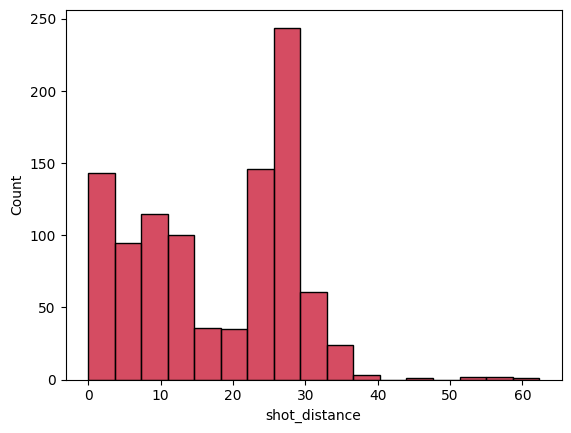

In [42]:
sns.histplot(x='shot_distance',data=fulldf,color=hawkscolor1)

Text(0.5, 1.0, 'Trae Young Shot Distance Boxplot')

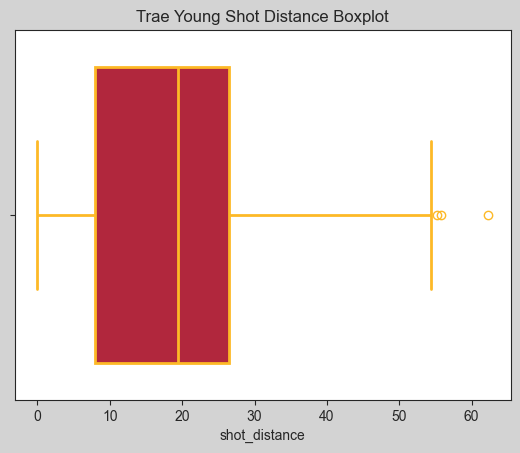

In [43]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.patch.set_facecolor('#d3d3d3')
fig.patch.set_facecolor('#d3d3d3')
# ax.set_facecolor('#000000')
# ax.set_ti
sns.boxplot(x='shot_distance',data=fulldf,color=hawkscolor1,fill=True,linecolor=hawkscolor2,linewidth=2,ax=ax)
plt.title('Trae Young Shot Distance Boxplot')

Text(0.5, 1.0, 'Trae Young Shot Distribution')

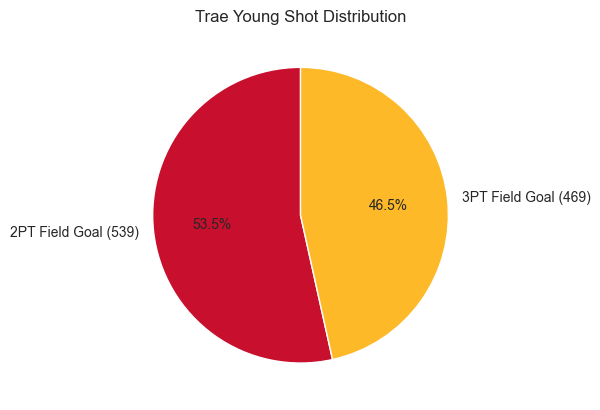

In [44]:
shot_type_counts = fulldf['SHOT_TYPE'].value_counts()

labels = [f"{shot_type} ({count})" for shot_type, count in zip(shot_type_counts.index, shot_type_counts.values)]

plt.pie(
    x=shot_type_counts.values,  
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,  
    colors=[hawkscolor1,hawkscolor2]
)

plt.title('Trae Young Shot Distribution')


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

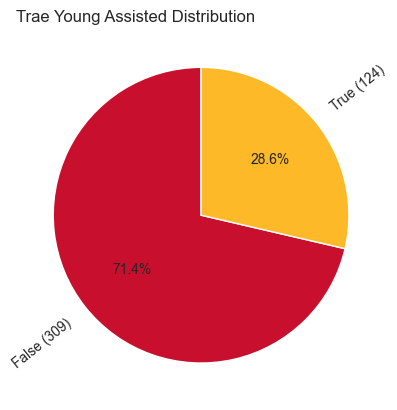

In [45]:
shot_type_counts = fulldf['assisted'].value_counts()

labels = [f"{shot_type} ({count})" for shot_type, count in zip(shot_type_counts.index, shot_type_counts.values)]

plt.pie(
    x=shot_type_counts.values,
    rotatelabels=45,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,  
    colors=[hawkscolor1,hawkscolor2]
)

plt.title('Trae Young Assisted Distribution',loc='left')
plt.tight_layout

In [46]:
mostAssisted = fulldf.groupby('assist_player')['assisted'].count().reset_index().sort_values(by='assisted',ascending=False)
mostAssisted.head(5)

,assist_player,assisted
5,Dejounte Murray,34
7,Jalen Johnson,26
1,Bogdan Bogdanovic,22
3,Clint Capela,10
10,Saddiq Bey,10


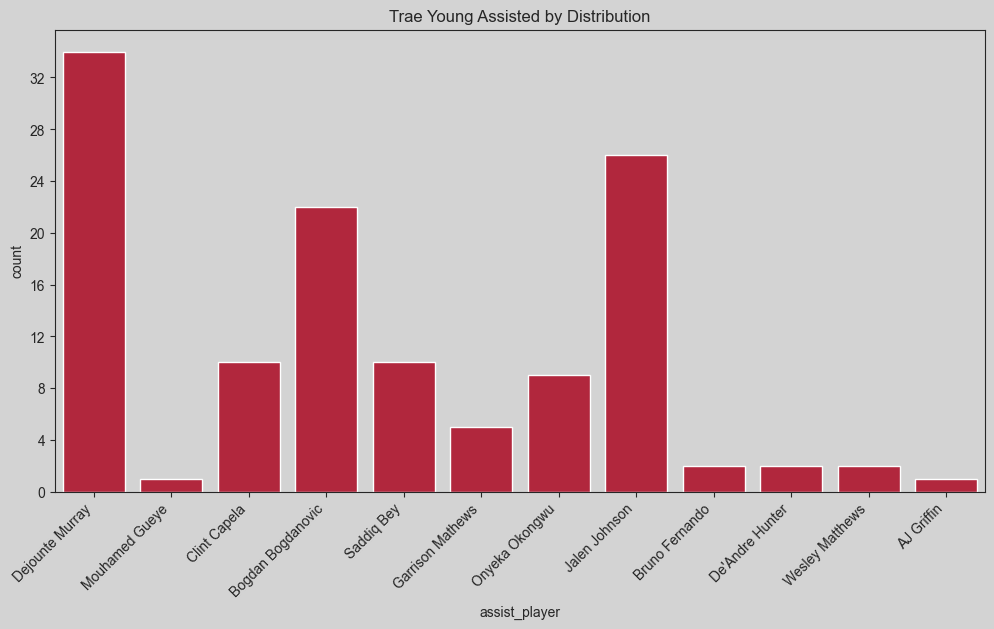

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Set style
sns.set_style('ticks')

# Adjust figure size
fig, ax = plt.subplots(figsize=(12, 6))  

fig.patch.set_facecolor('#d3d3d3')
ax.set_facecolor('#d3d3d3')

sns.countplot(data=fulldf, x='assist_player', color=hawkscolor1, ax=ax)

plt.title('Trae Young Assisted by Distribution')

plt.xticks(rotation=45, ha='right')  
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()



In [48]:
fulldf['game_date'] = pd.to_datetime(fulldf['game_date'])

In [49]:
fulldf['Month'] = fulldf['game_date'].apply(lambda x: x.month)

In [50]:
fgpercbyMonth = fulldf.groupby('Month')['SHOT_MADE_FLAG'].mean().reset_index()
fgpercbyMonth
# fgpercbyMonth.replace(1,13)

,Month,SHOT_MADE_FLAG
0,1,0.388393
1,2,0.437908
2,4,0.576923
3,10,0.309859
4,11,0.430233
5,12,0.474638


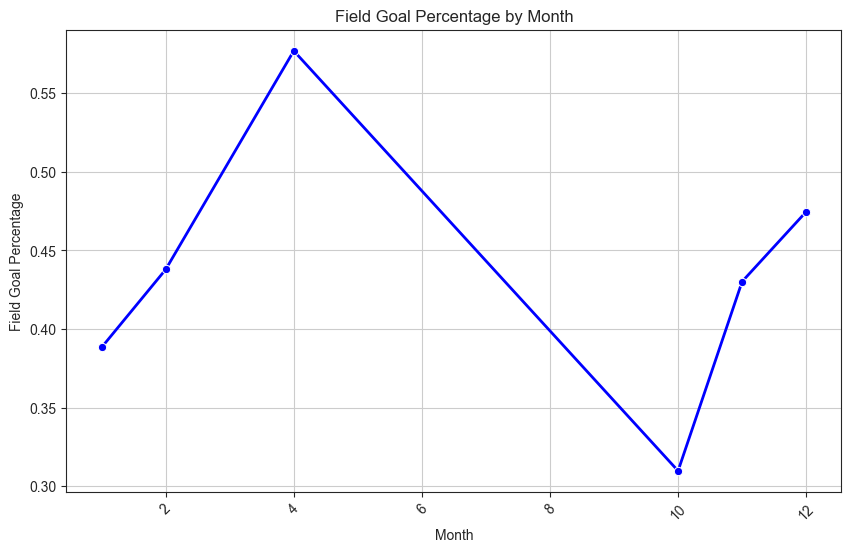

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='SHOT_MADE_FLAG', data=fgpercbyMonth, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Field Goal Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Field Goal Percentage')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [52]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


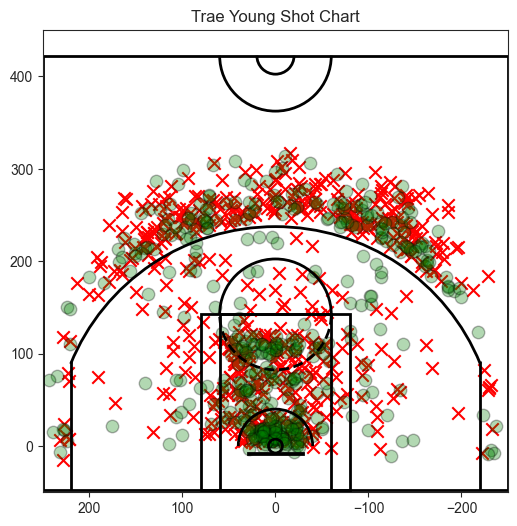

In [329]:
dfnofar = fulldf[fulldf['shot_distance'] <= 32]
plt.figure(figsize=(6,6))
dfmake = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 1]
dfmiss = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 0]
plt.scatter(dfmiss.LOC_X, dfmiss.LOC_Y,c='red',marker ='x',s=80)
plt.scatter(dfmake.LOC_X, dfmake.LOC_Y,c='green',marker='o',alpha=0.3,s=80,edgecolors='black')

draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(250,-250)
plt.ylim(-50,450)

plt.title('Trae Young Shot Chart')
plt.show()


/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_1631/3493754591.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(fulldf['SHOT_ZONE_AREA'].unique()))
/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_1631/3493754591.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


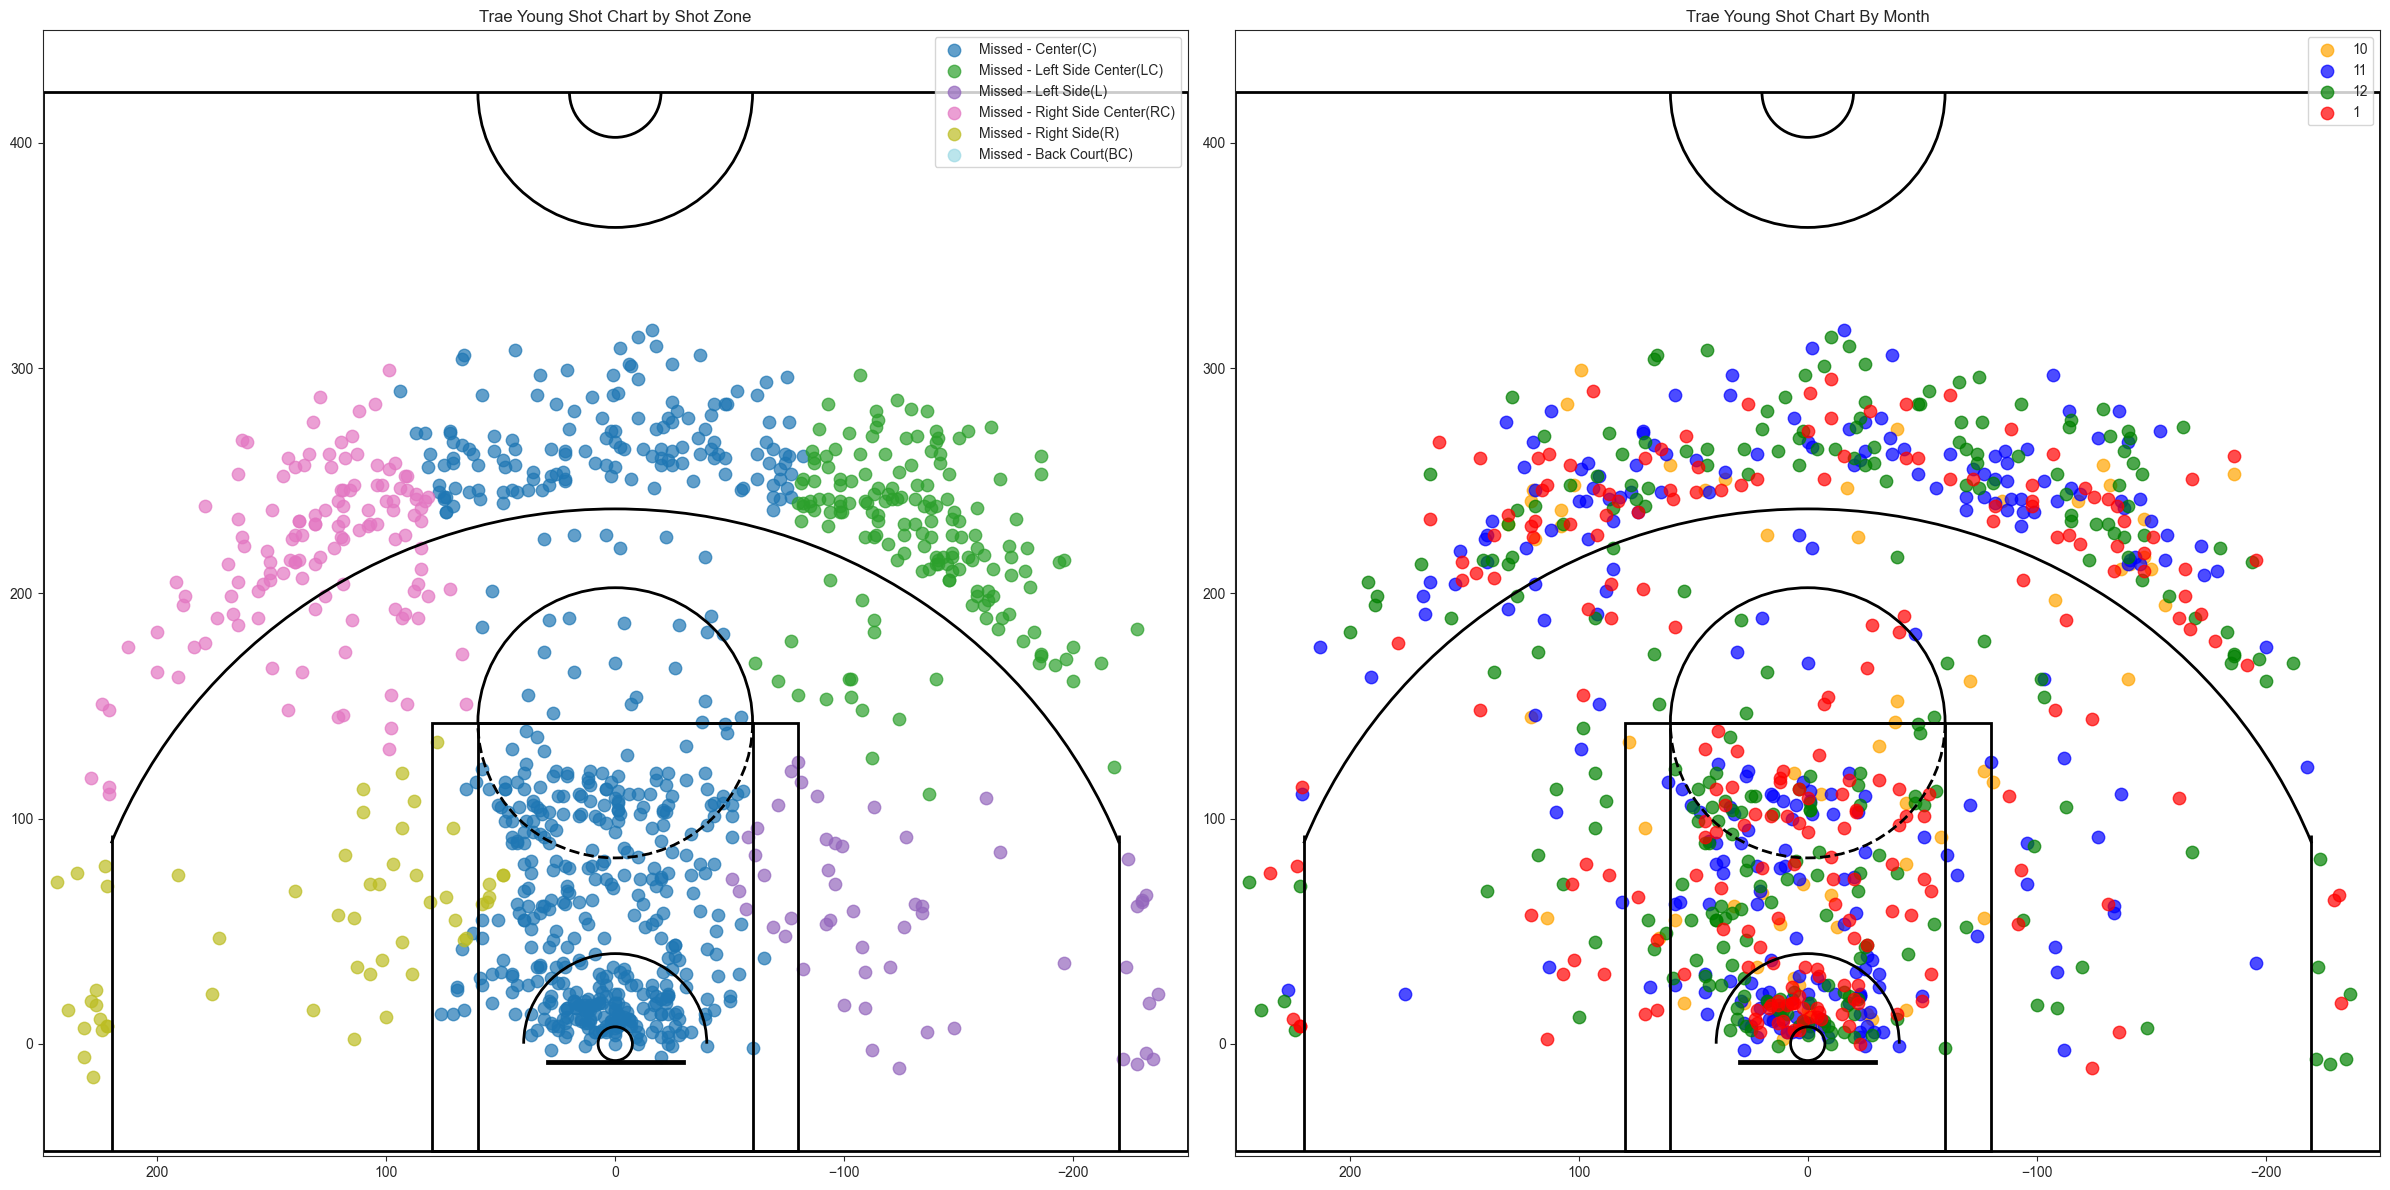

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.get_cmap('tab20', len(fulldf['SHOT_ZONE_AREA'].unique()))

shot_zone_colors = {zone: colormap(i) for i, zone in enumerate(fulldf['SHOT_ZONE_AREA'].unique())}

month_colors = {
    10: 'orange',  # October
    11: 'blue',    # November
    12: 'green',   # December
    1: 'red'       # January
}

dfnofar = fulldf[fulldf['shot_distance'] <= 32]
dfmake = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 1]
dfmiss = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

for shot_zone in shot_zone_colors:
    missed_data = dfnofar[dfnofar['SHOT_ZONE_AREA'] == shot_zone]
    ax1.scatter(
        missed_data['LOC_X'], missed_data['LOC_Y'], 
        c=shot_zone_colors[shot_zone], marker='o', s=80, label=f'Missed - {shot_zone}', alpha=0.7
    )

ax1.set_title('Trae Young Shot Chart by Shot Zone')
ax1.set_xlim(250, -250)
ax1.set_ylim(-50, 450)
ax1.legend()
draw_court(ax=ax1, outer_lines=True)

# Plot 2: Trae Young Shot Chart with Month-Based Colors
for month in month_colors:
    month_data = dfnofar[dfnofar['Month'] == month]
    ax2.scatter(
        month_data['LOC_X'], month_data['LOC_Y'], 
        c=month_colors[month], marker='o', s=80, alpha=0.7, label=f'{month}',
    )

ax2.set_title('Trae Young Shot Chart By Month')
ax2.set_xlim(250, -250)
ax2.set_ylim(-50, 450)
ax2.legend()
draw_court(ax=ax2, outer_lines=True)

# Display the side-by-side plots
plt.tight_layout()
plt.show()


In [86]:
bytime = fulldf.groupby(['PERIOD','SHOT_ZONE_AREA'])['SHOT_MADE_FLAG'].mean().reset_index()
bytime.sort_values(by='SHOT_MADE_FLAG',inplace=True,ascending=False)
bytime.head(10)

,PERIOD,SHOT_ZONE_AREA,SHOT_MADE_FLAG
23,5,Center(C),0.625000
14,3,Left Side(L),0.615385
3,1,Left Side(L),0.571429
12,3,Center(C),0.513699
24,5,Left Side Center(LC),0.500000
16,3,Right Side(R),0.500000
1,1,Center(C),0.470588
13,3,Left Side Center(LC),0.461538
19,4,Left Side Center(LC),0.460000
5,1,Right Side(R),0.454545


In [89]:
periodpv = pd.pivot_table(index='PERIOD',columns='SHOT_ZONE_AREA',values='SHOT_MADE_FLAG',data=bytime)

<Axes: xlabel='SHOT_ZONE_AREA', ylabel='PERIOD'>

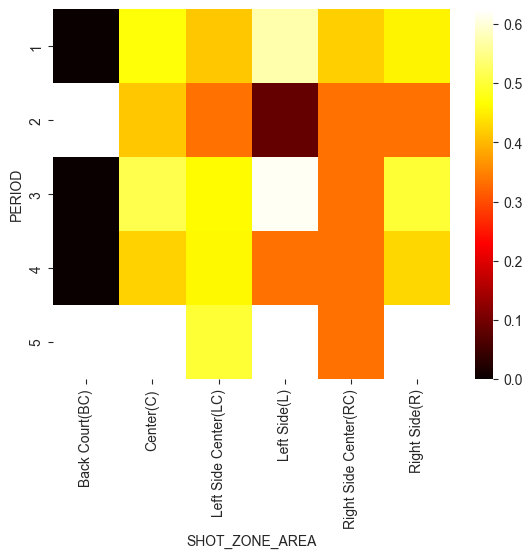

In [90]:
sns.heatmap(periodpv,cmap='hot')

In [95]:
madeshots = fulldf[fulldf['SHOT_MADE_FLAG'] == 1]

In [99]:
byGame = madeshots.groupby('game_date')['shot_value'].sum().reset_index()
byGame.sort_values(by='shot_value',ascending=False,inplace=True)

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_1631/4032101846.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='game_date',y='shot_value',data=byGame.head(10),palette=['red','orange','blue','green','purple','yellow','gray','black','indigo','teal'])


Text(0.5, 1.0, "Trae Young's Highest Scoring Games (Without FTs)")

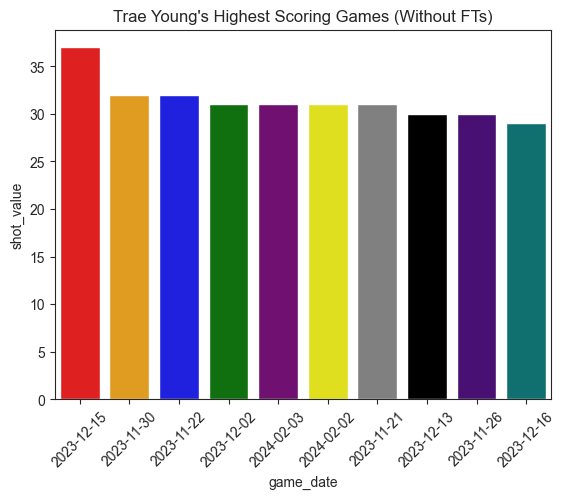

In [108]:
sns.barplot(x='game_date',y='shot_value',data=byGame.head(10),palette=['red','orange','blue','green','purple','yellow','gray','black','indigo','teal'])
ax.bar_label(ax.containers[0], fmt='%.1f', label_type='center', color='white', fontsize=10)
plt.xticks(rotation=45)
plt.title('Trae Young\'s Highest Scoring Games (Without FTs)')

In [114]:
byAction = fulldf.groupby('ACTION_TYPE')['SHOT_MADE_FLAG'].agg(['mean','count']).reset_index().rename(columns={'mean':'FG%','count':'Shots'})
byAction.sort_values(by='Shots',inplace=True,ascending=False)
byAction.head(5)

,ACTION_TYPE,FG%,Shots
15,Pullup Jump shot,0.413043,230
4,Driving Floating Jump Shot,0.478947,190
22,Step Back Jump shot,0.382550,149
13,Jump Shot,0.330579,121
5,Driving Layup Shot,0.408602,93


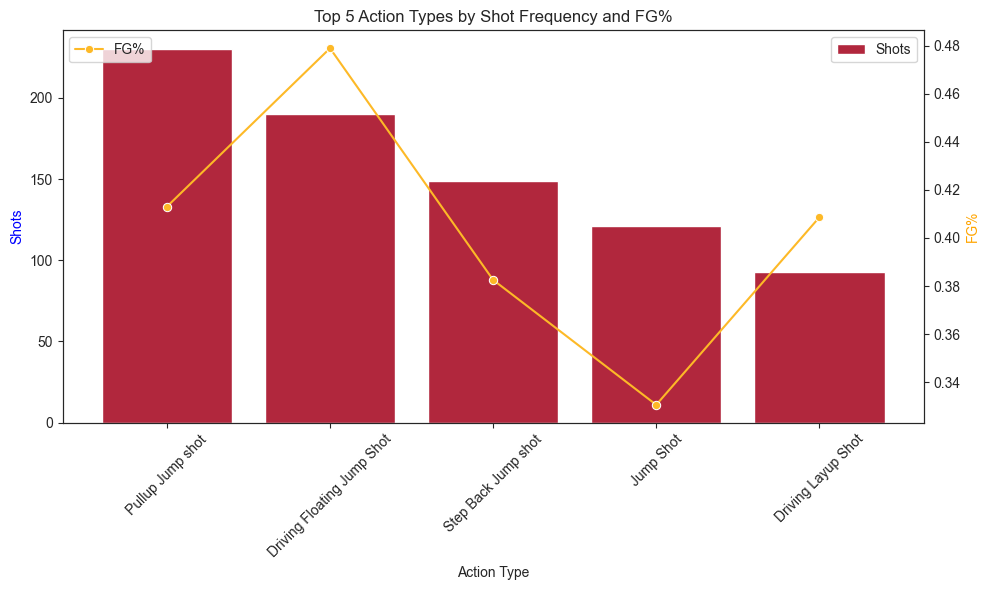

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 5 action types
top_actions = byAction.head(5)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 'Shots'
sns.barplot(
    data=top_actions,
    x='ACTION_TYPE',
    y='Shots',
    ax=ax1,
    color=hawkscolor1,
    label='Shots'
)

# Create a secondary y-axis for FG%
ax2 = ax1.twinx()
sns.lineplot(
    data=top_actions,
    x='ACTION_TYPE',
    y='FG%',
    ax=ax2,
    color=hawkscolor2,
    marker='o',
    label='FG%'
)

# Customize plot
ax1.set_ylabel('Shots', color='blue')
ax2.set_ylabel('FG%', color='orange')
ax1.set_title('Top 5 Action Types by Shot Frequency and FG%')
ax1.set_xlabel('Action Type')
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()


In [122]:
points_from_assists = assistdf['shot_value'].sum()
points_from_assists

1382

In [123]:
points_scored = madeshots['shot_value'].sum()
points_scored

1041

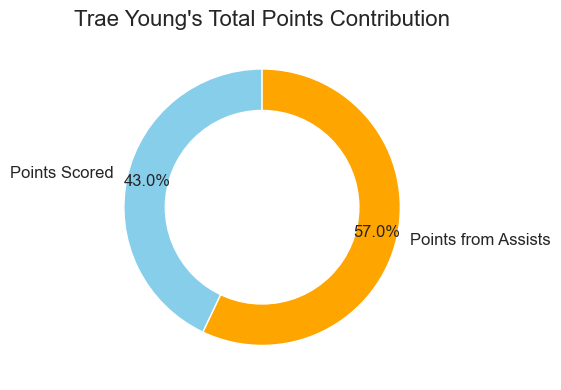

In [128]:

# Data
categories = ['Points Scored', 'Points from Assists']
values = [points_scored, points_from_assists]
colors = ['skyblue', 'orange']

# Create a donut chart
plt.figure(figsize=(5, 4))

# Pie chart
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 12})

# Draw a circle at the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title('Trae Young\'s Total Points Contribution', fontsize=16)
plt.tight_layout()

plt.show()


In [129]:
fulldf[['lineup_id']]

,lineup_id
0,1629027-1629726-1630249-1631100-1631243
1,1629027-1629726-1630249-1631100-1631243
2,1629027-1629631-1629726-1631243-203992
3,1629027-1629631-1629726-1631243-203992
4,1627749-1628981-1629027-1629631-203992
...,...
1003,1629027-1630168-1630180-1630552-203992
1004,1629027-1630168-1630552-1631100-203992
1005,1627749-1629027-1629631-1630180-203991
1006,1627749-1629027-1629631-1630180-203991


In [130]:
p.find_player_by_id(id)

{'id': 1629027,
 'full_name': 'Trae Young',
 'first_name': 'Trae',
 'last_name': 'Young',
 'is_active': True}

In [133]:
def findLineup(row):
    lineup = ''
    ids = row.split('-')
    for id in ids:
        pinfo = p.find_player_by_id(id)
        name = pinfo['full_name']
        lineup += name + ', '
    lineup = lineup[0:-1]
    return lineup
fulldf['lineup'] = fulldf['lineup_id'].apply(findLineup)
fullastdf['lineup'] = fulldf['lineup_id'].apply(findLineup)

In [141]:
bylineup = fulldf.groupby('lineup')['SHOT_MADE_FLAG'].agg(['mean','count']).reset_index().rename(columns={'mean':'FG%','count':'Shots'})
bylineup.sort_values(by=['Shots','FG%'],inplace=True,ascending=False)
bylineup.head(5)

,lineup,FG%,Shots
46,"Dejounte Murray, Trae Young, Saddiq Bey, Jalen...",0.382353,136
29,"Dejounte Murray, Trae Young, De'Andre Hunter, ...",0.416667,96
22,"Dejounte Murray, Trae Young, De'Andre Hunter, ...",0.362500,80
83,"Trae Young, Onyeka Okongwu, Saddiq Bey, Jalen ...",0.351852,54
62,"Trae Young, Garrison Mathews, Onyeka Okongwu, ...",0.458333,48


In [143]:
fulldf['block_player'].unique()

array([None, 'Kyle Anderson', 'Ayo Dosunmu', 'Mo Bamba',
       'Kristaps Porzingis', 'Al Horford', 'Brandin Podziemski',
       'Andrew Wiggins', 'Scottie Barnes', 'Dereck Lively II',
       'Tristan Thompson', 'Cole Anthony', 'Victor Wembanyama',
       'Deni Avdija', 'Isaiah Jackson', 'T.J. McConnell', 'Buddy Hield',
       'Nicolas Batum', 'Paul Reed', 'Jordan Poole', 'Tyus Jones',
       'Jaime Jaquez Jr.', 'Jabari Smith Jr.', 'Jakob Poeltl',
       'Chris Boucher', 'Nic Claxton', 'Brook Lopez', 'Malaki Branham',
       'Evan Mobley', 'Robert Covington', 'Haywood Highsmith',
       'Dru Smith', 'Luguentz Dort', 'CJ McCollum', 'Jonas Valanciunas',
       'Jaden McDaniels', 'Mitchell Robinson', 'Nick Richards',
       'Gordon Hayward'], dtype=object)

In [145]:
fulldf['block_player'].value_counts().head(5)

block_player
Victor Wembanyama    4
Jakob Poeltl         4
Al Horford           3
Isaiah Jackson       3
Mo Bamba             2
Name: count, dtype: int64

In [148]:
fulldf['putback'].value_counts()

putback
False    1002
True        6
Name: count, dtype: int64

In [152]:
fulldf[fulldf['putback'] == True][['game_date','opponent','PERIOD','time','ACTION_TYPE']]

,game_date,opponent,PERIOD,time,ACTION_TYPE
8,2024-04-14,IND,1,06:42,Tip Layup Shot
257,2024-01-17,ORL,3,01:50,Driving Floating Jump Shot
567,2023-12-15,TOR,3,01:01,Layup Shot
673,2023-12-02,MIL,1,00:46,Driving Floating Jump Shot
743,2023-11-26,BOS,1,00:55,Driving Layup Shot
774,2023-11-22,BKN,4,00:23,Putback Layup Shot


In [154]:
fulldf['start_type'].value_counts()

start_type
OffAtRimMake             177
OffDeadball              118
OffFTMake                110
OffArc3Miss               91
OffArc3Make               84
OffLiveBallTurnover       65
OffShortMidRangeMake      65
OffShortMidRangeMiss      59
OffTimeout                47
OffCorner3Make            38
OffCorner3Miss            36
OffAtRimMiss              32
OffLongMidRangeMake       23
OffFTMiss                 22
OffLongMidRangeMiss       20
OffAtRimBlock             12
OffShortMidRangeBlock      6
OffArc3Block               2
OffCorner3Block            1
Name: count, dtype: int64

In [ ]:
fulldf['start_type'] = fulldf['start_type'].apply(lambda x: x[3:])

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_1631/3596920551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fulldf, x='start_type', palette='Set2')


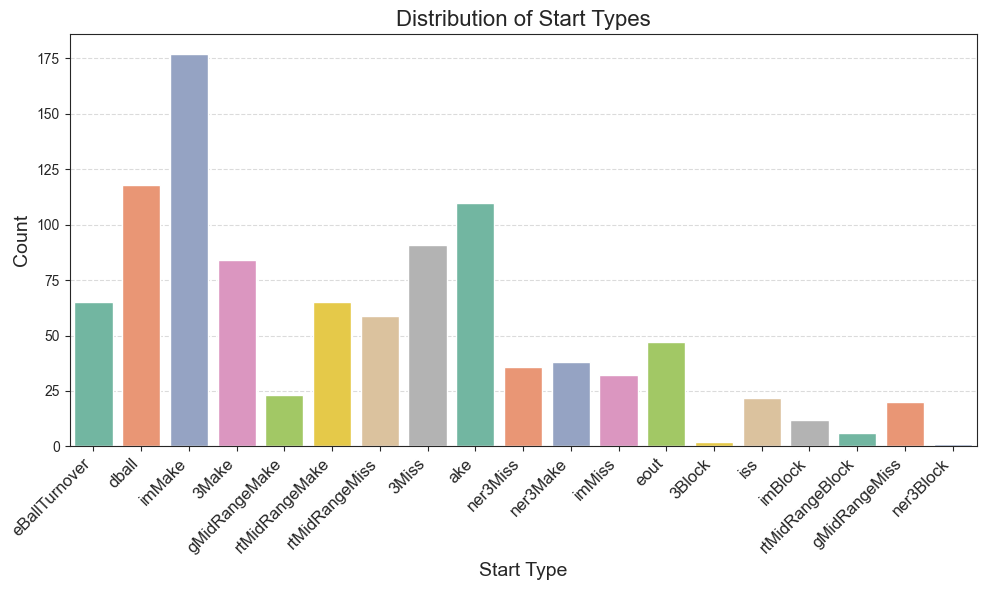

In [314]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fulldf, x='start_type', palette='Set2')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Distribution of Start Types', fontsize=16)
plt.xlabel('Start Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [168]:
fulldf[['shot_type','SHOT_ZONE_BASIC']]

,shot_type,SHOT_ZONE_BASIC
0,AtRim,Restricted Area
1,Arc3,Above the Break 3
2,Arc3,Above the Break 3
3,ShortMidRange,In The Paint (Non-RA)
4,ShortMidRange,In The Paint (Non-RA)
...,...,...
1003,AtRim,Restricted Area
1004,AtRim,Restricted Area
1005,Arc3,Above the Break 3
1006,Arc3,Above the Break 3


In [303]:
fullastdf.head()

,GRID_TYPE,gid,event_num,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,shot_type,shot_value,start_time,start_type,team,time,url,x,y,lineup
0,Shot Chart Detail,0022300029,39,1630552,Jalen Johnson,1610612737,Atlanta Hawks,1,8,17,...,AtRim,2,509.0,OffAtRimMake,ATL,08:17,https://videos.nba.com/nba/pbp/media/2023/11/1...,-1,11,"Trae Young, Garrison Mathews, Vit Krejci, AJ G..."
1,Shot Chart Detail,0022300029,166,1630168,Onyeka Okongwu,1610612737,Atlanta Hawks,2,11,30,...,Corner3,3,702.0,OffCorner3Miss,ATL,11:30,https://videos.nba.com/nba/pbp/media/2023/11/1...,225,-15,"Trae Young, Garrison Mathews, Vit Krejci, AJ G..."
2,Shot Chart Detail,0022300029,170,203992,Bogdan Bogdanović,1610612737,Atlanta Hawks,2,10,57,...,Arc3,3,660.0,OffShortMidRangeMiss,ATL,10:57,https://videos.nba.com/nba/pbp/media/2023/11/1...,-180,188,"Trae Young, De'Andre Hunter, Garrison Mathews,..."
3,Shot Chart Detail,0022300029,213,1630180,Saddiq Bey,1610612737,Atlanta Hawks,2,8,22,...,AtRim,2,506.0,OffLiveBallTurnover,ATL,08:22,https://videos.nba.com/nba/pbp/media/2023/11/1...,12,13,"Trae Young, De'Andre Hunter, Garrison Mathews,..."
4,Shot Chart Detail,0022300029,278,1629631,De'Andre Hunter,1610612737,Atlanta Hawks,2,4,14,...,AtRim,2,262.0,OffShortMidRangeMake,ATL,04:14,https://videos.nba.com/nba/pbp/media/2023/11/1...,-5,16,"Dejounte Murray, Bruno Fernando, Trae Young, D..."


In [301]:
fullastdf.columns

Index(['GRID_TYPE', 'gid', 'event_num', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING',
       'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC',
       'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM',
       'assist_player', 'assist_player_id', 'assisted', 'block_player',
       'block_player_id', 'blocked', 'dtid', 'end_time', 'game_date',
       'lineup_id', 'made', 'opponent', 'opponent_lineup_id',
       'oreb_rebound_player', 'oreb_rebound_player_id', 'oreb_shot_player',
       'oreb_shot_player_id', 'oreb_shot_type', 'otid', 'period', 'player',
       'player_id', 'poss_num', 'possession_start_time',
       'previous_poss_end_rebound_pid', 'previous_poss_end_rebound_player',
       'previous_poss_end_shooter_pid', 'previous_poss_end_shooter_player',
       'previous_poss_end_steal_pid', 'previous_poss_end_steal

/Users/ryan/Library/Python/3.9/lib/python/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


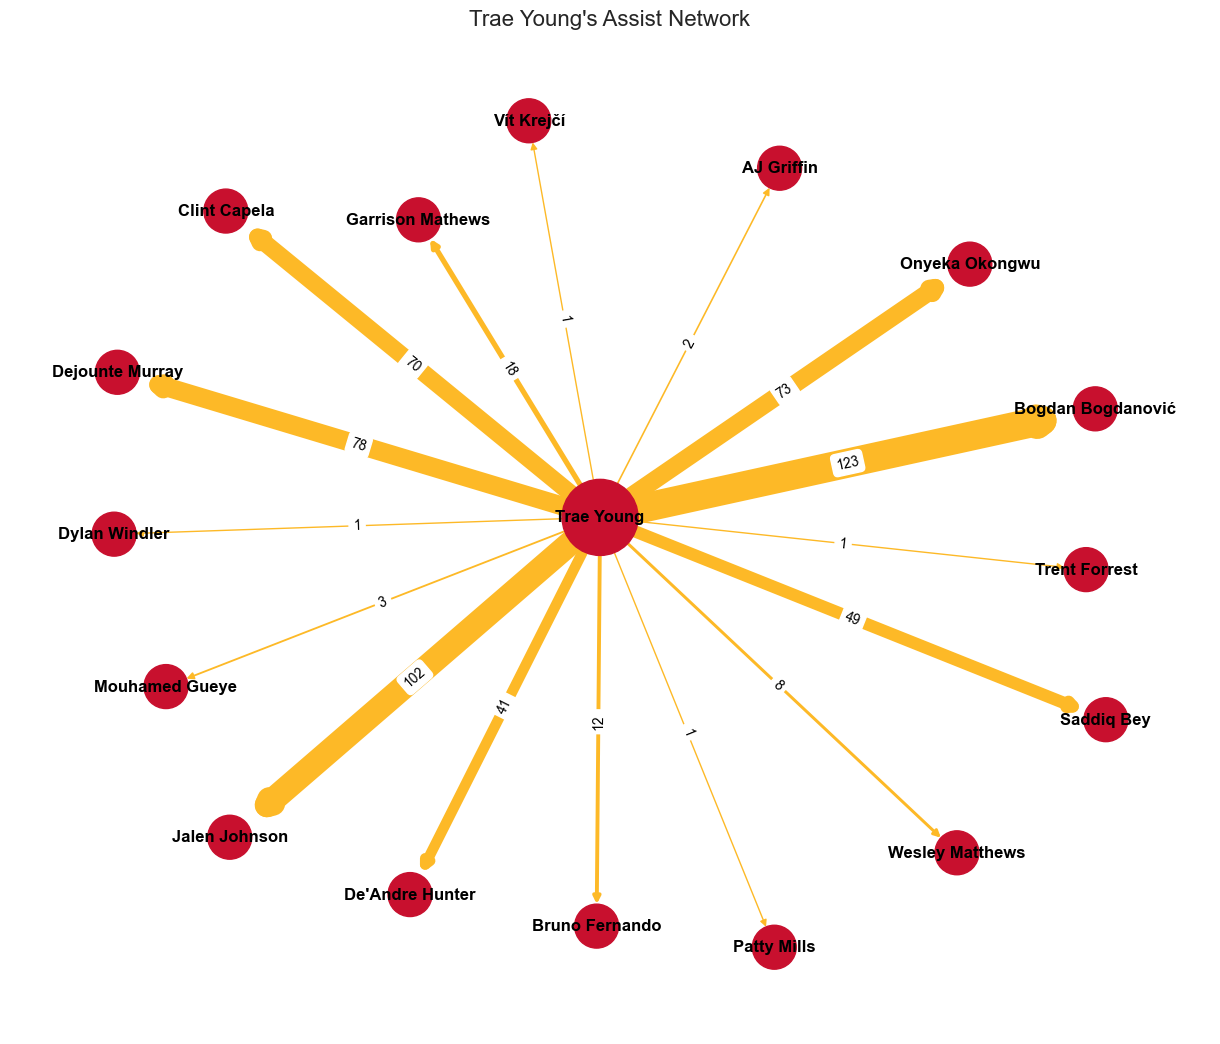

In [313]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

assist_pairs = fullastdf.groupby('assist_player')['PLAYER_NAME'].value_counts().reset_index(name='count')

# Create a directed graph
G = nx.DiGraph()

G.add_node('Trae Young')

for _, row in assist_pairs.iterrows():
    G.add_edge('Trae Young', row['PLAYER_NAME'], weight=row['count'])

max_weight = max([G[u][v]['weight'] for u, v in G.edges()])
min_weight = min([G[u][v]['weight'] for u, v in G.edges()])
scale_factor = 20  # Maximum thickness for edges

edge_widths = [((G[u][v]['weight'] - min_weight) / (max_weight - min_weight)) * scale_factor + 1 
               for u, v in G.edges()]

edge_colors = [G[u][v]['weight'] for u, v in G.edges()]  # Color intensity based on number of assists

plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, seed=42)

node_sizes = [3000 if node == 'Trae Young' else 1000 for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=hawkscolor1, font_size=12, 
        font_weight='bold', edge_color=hawkscolor2, width=edge_widths, cmap=plt.cm.Blues)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Trae Young's Assist Network", fontsize=16)
plt.show()


In [317]:
byStart = fullastdf.groupby('start_type')['assisted'].count().reset_index()

In [320]:
byStart.sort_values(by='assisted',inplace=True,ascending=False)
byStart

,start_type,assisted
3,OffAtRimMake,97
7,OffDeadball,70
8,OffFTMake,57
1,OffArc3Miss,52
10,OffLiveBallTurnover,48
14,OffShortMidRangeMake,45
0,OffArc3Make,44
15,OffShortMidRangeMiss,34
5,OffCorner3Make,24
16,OffTimeout,22


In [322]:
byZone = fullastdf.groupby('SHOT_ZONE_BASIC')['assisted'].count().reset_index()

In [323]:
byZone.sort_values(by='assisted',inplace=True,ascending=False)
byZone

,SHOT_ZONE_BASIC,assisted
4,Restricted Area,278
0,Above the Break 3,145
1,In The Paint (Non-RA),67
2,Left Corner 3,39
5,Right Corner 3,32
3,Mid-Range,22


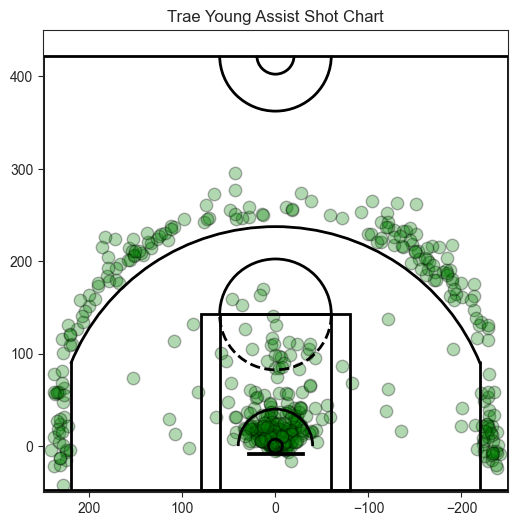

In [328]:
dfnofar = fullastdf[fullastdf['shot_distance'] <= 32]
plt.figure(figsize=(6,6))
dfmake = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 1]
dfmiss = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 0]
plt.scatter(dfmiss.LOC_X, dfmiss.LOC_Y,c='red',marker ='x',s=80)
plt.scatter(dfmake.LOC_X, dfmake.LOC_Y,c='green',marker='o',alpha=0.3,s=80,edgecolors='black')

draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(250,-250)
plt.ylim(-50,450)
plt.title('Trae Young Assist Shot Chart')
plt.show()


In [331]:
byGameAst = fullastdf.groupby('game_date')['assisted'].count().reset_index()

In [334]:
byGameAst.sort_values(by='assisted',inplace=True,ascending=False)
byGameAst.head(5)

,game_date,assisted
9,2023-11-15,17
20,2023-12-13,17
23,2023-12-18,15
42,2024-02-02,15
24,2023-12-20,14


In [338]:
bytimeAst = fulldf.groupby(['PERIOD','MINUTES_REMAINING'])['assisted'].count().reset_index()
bytimeAst.sort_values(by='assisted',inplace=True,ascending=False)
bytimeAst.head(10)

,PERIOD,MINUTES_REMAINING,assisted
0,1,0,23
45,4,10,19
23,3,0,19
6,1,7,17
11,2,0,16
1,1,1,16
30,3,7,15
2,1,2,14
32,3,9,14
24,3,1,14


In [341]:
periodpvast = pd.pivot_table(index='PERIOD',columns='MINUTES_REMAINING',values='assisted',data=bytimeAst)

<Axes: xlabel='MINUTES_REMAINING', ylabel='PERIOD'>

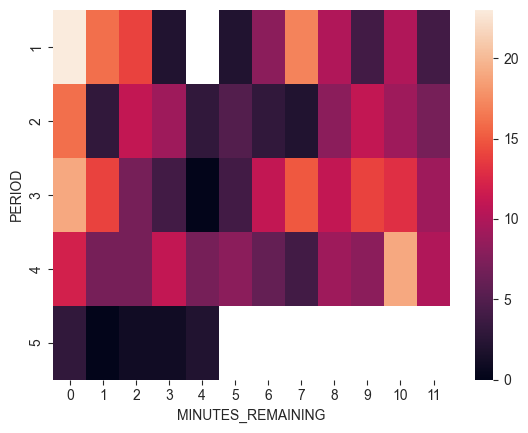

In [342]:
sns.heatmap(periodpvast)

In [344]:
fullastdf['shot_distance'].mean()

11.528816466552316